In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%load_ext google.colab.data_table

In [2]:
# Ingest gdp data from google drive
df_gdp = pd.read_csv('/content/drive/MyDrive/gdp.csv')

# Rename relevant columns and drop irrelevant columns
df_gdp.rename(columns={'Entity':'country', 'Year':'year', 'GDP per capita':'GDP'}, inplace=True)
df_gdp.drop(columns=['Code','417485-annotations'], inplace=True)

display(df_gdp.head(5))

# Ingest gini data from google drive
df_gini = pd.read_csv('/content/drive/MyDrive/inequality-gini.csv')

# Rename relevant columns and drop irrelevant columns
df_gini.rename(columns={'Entity':'country', 'Year':'year', 'Gini coefficient':'gini_coefficient'}, inplace=True)
df_gini.drop(columns=['Code'], inplace=True)

display(df_gini.head(5))

,country,year,GDP
0,Afghanistan,1950,1156.0
1,Afghanistan,1951,1170.0
2,Afghanistan,1952,1189.0
3,Afghanistan,1953,1240.0
4,Afghanistan,1954,1245.0


,country,year,gini_coefficient
0,Albania,1996,0.270103
1,Albania,2002,0.317390
2,Albania,2005,0.305957
3,Albania,2008,0.299847
4,Albania,2012,0.289605


In [3]:
# Join the two dataframes on column country and year
df = pd.merge(df_gdp, df_gini, on=['country','year'])

display(df.head(10))

,country,year,GDP,gini_coefficient
0,Albania,1996,3965.6853,0.270103
1,Albania,2002,5608.9624,0.317390
2,Albania,2005,6858.4670,0.305957
3,Albania,2008,8522.1300,0.299847
4,Albania,2012,9592.0000,0.289605
5,Albania,2014,9808.0000,0.345989
6,Albania,2015,10032.0000,0.327537
7,Albania,2016,10342.0000,0.337363
8,Albania,2017,10702.1200,0.330557
9,Albania,2018,11104.1660,0.301483


In [4]:
# Calculate pearson correlation coefficient
from scipy.stats import pearsonr

pearson_cor = pearsonr(df['GDP'], df['gini_coefficient'])
display(pearson_cor)

(-0.4322580722389133, 2.7052703476321857e-83)

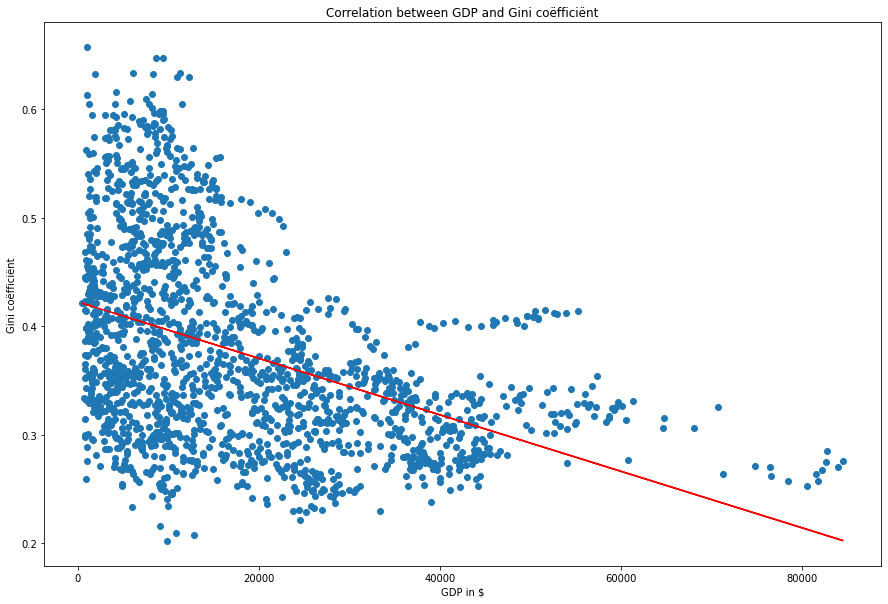

In [5]:
# Create a scatter plot and a linear regression line to visualize the relationship/correlation
# Reason: Not all relationships are linear. A simple way to evaluate whether a relationship is reasonably linear is to examine a scatter plot.
import numpy.polynomial.polynomial as poly

fig, ax = plt.subplots()

ax.scatter(df['GDP'], df['gini_coefficient'])
# ax.set_ylim(0,1)
ax.set_title('Correlation between GDP and Gini coëfficiënt')
ax.set_xlabel('GDP in $')
ax.set_ylabel('Gini coëfficiënt')
fig.set_size_inches(15,10)

try:
    coefs = poly.polyfit(df['GDP'], df['gini_coefficient'], 1)
    ffit = poly.polyval(df['GDP'], coefs)
    plt.plot(df['GDP'], ffit, color='red')
except ValueError as error:
    print(f"Could not plot linear regression line because:{error}")

In [6]:
# Vraag
print("Vraag: Is there a relation between a country's Gross Domestrict Product (GDP) and its income inequality?")

# Antwoord 
print(f"""
Uitkomst:
De pearson correlatie coëfficiënt is {pearson_cor[0]}. 
Het betreft een negatieve correlatie wat inhoudt dat bij een stijging van het GDP, de gini coëfficiënt (en dus de inkomensongelijkheid) daalt en vice versa 
(let op: hiermee wordt niet bedoeld dat er een causaal verband is!).
Gebaseerd op de classificatie van Rea en Parker (2014) is dit een relatief sterke correlatie. 

De p-value is {pearson_cor[1]}. Dit is lager dan 0.05 wat inhoudt dat de correlatie significant is.

Conclusie:
Ja, er is een significante relatief sterke negatieve correlatie tussen GDP en inkomensongelijkheid.
""")

Vraag: Is there a relation between a country's Gross Domestrict Product (GDP) and its income inequality?

Uitkomst:
De pearson correlatie coëfficiënt is -0.4322580722389133. 
Het betreft een negatieve correlatie wat inhoudt dat bij een stijging van het GDP, de gini coëfficiënt (en dus de inkomensongelijkheid) daalt en vice versa 
(let op: hiermee wordt niet bedoeld dat er een causaal verband is!).
Gebaseerd op de classificatie van Rea en Parker (2014) is dit een relatief sterke correlatie. 

De p-value is 2.7052703476321857e-83. Dit is lager dan 0.05 wat inhoudt dat de correlatie significant is.

Conclusie:
Ja, er is een significante relatief sterke negatieve correlatie tussen GDP en inkomensongelijkheid.

